# 皆さんこんにちは。 Hello everyone!

私の今年の目標のうちの一つはカグルノートブックを日本語で書く事です。ドイツ出身の日本のハーフですが日本語の文章を書く機会が少ないのがこの目標の理由です。

One of my goals for 2021 was to write one Kaggle notebook in Japanese. Although I am half Japanese, I never practice my Japanese writing skills living Germany.

最近秋が始まって、私が今住んでいるドイツは寒くなってきたので部屋に篭ってカグルするのも楽しいのでこの目標に挑戦してみたいと思います。

Since it has gotten quite cold with the beginning of autumn, I think this is a great time to stay in and to tackle this goal of mine.

以前２０１９年のカグルサーベイを日本の女性について分析してみたノートブック[Japan: Country of the Rising Women](https://www.kaggle.com/iamleonie/japan-country-of-the-rising-women)もあるので、良ければ是非読んでみてください。

For the 2019 Kaggle survey I have already written a notebook about Japan called [Japan: Country of the Rising Women](https://www.kaggle.com/iamleonie/japan-country-of-the-rising-women) where I analyze women in Japan. If you are interested, please feel free to have a look.



**注意:**　変な日本語を使ってしまう可能性が高いので、コメントで注意して頂ければ、勉強になります。

**Note:** My Japanese might be a little rusty, so please feel free to correct me in the comments below. It would help me improve.

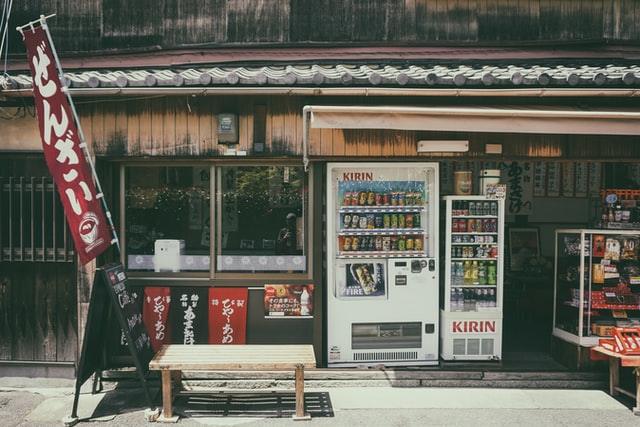

Photo by <a href="https://unsplash.com/@daniel840528?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Daniel Tseng</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse

plt.rcParams.update({'font.size': 14})
from math import pi

import warnings
warnings.filterwarnings("ignore")

# Load 2021 Kaggle survey
responses = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv", 
                        low_memory = False)

# Remove first row
responses = responses[1:].reset_index(drop=True)

# Color palette
other_color = "lightgrey"
japan_color = "crimson"

responses['japan'] = responses['Q3'] == 'Japan'

インドとアメリカと比べると、日本からカグルを使っている方々はインドとアメリカを足した十分の一です。

In comparison to India and the U.S.A., Japanese Kagglers only make up 10% of Indian and US American Kagglers.


それでも世界的に比べてみると、日本は3位です！

However, on a global scale Japan ranks third!

In [ ]:
df1 = responses['Q3'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
df1 = df1.iloc[:11]
df1 = df1.drop([2])
df1['index'] = df1['index'].replace({'United States of America' : 'USA', 
                                    'United Kingdom of Great Britain and Northern Ireland' : 'UK'})

g = sns.catplot(x='index',y='percent',kind='bar',data=df1,
                height=6, aspect=4/2,
                palette = [other_color, other_color, japan_color, other_color, other_color, other_color, other_color, other_color, other_color, other_color])
g.ax.set_ylim(0,30)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + 0.2
    txt_y = p.get_height()+0.5
    g.ax.text(txt_x,txt_y,txt)

g.ax.set_xlabel('Country')
g.ax.set_ylabel('Percentage [%]')
g.ax.set_title('Where Do Kagglers Currently Reside?')
plt.show()

# 日本のカグラーとは？　Who are Japanese Kagglers?

先ずは日本のカグラーとはどんな方々なのか検討してみたいと思います。それには性別、年齢、職業などをみていきたいと思います。

Let's begin by exploring who Japanese Kagglers are. For this, we will look at the gender distribution, age and current role.

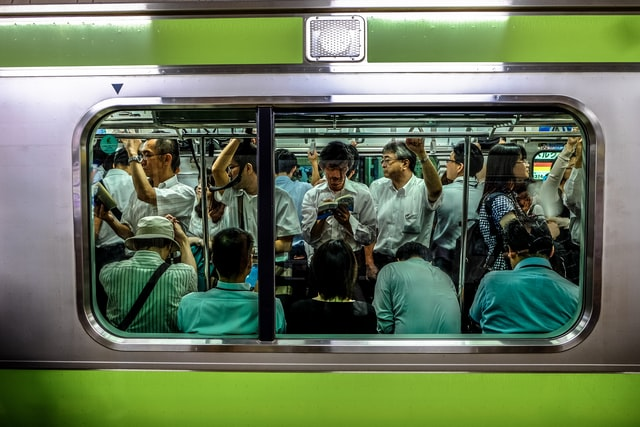

Photo by <a href="https://unsplash.com/@francesco_ungaro?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Francesco Ungaro</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  



以前２０１９年のカグルサーベイを元にしたノートブック[Japan: Country of the Rising Women](https://www.kaggle.com/iamleonie/japan-country-of-the-rising-women)を書いた時は日本では女性カグラーの比率が正解的に比べると低かったので今回も一度確認してみます。

Since the ratio of female Kagglers was lower in comparison to the rest of the world in Japan when I wrote my notebook [Japan: Country of the Rising Women](https://www.kaggle.com/iamleonie/japan-country-of-the-rising-women) based on the 2019 Kaggle survey data, I would like to check it this year as well.

たしかに、２０２１年でも日本では女性カグラーの比率（１０.９％）が世界的（１９.２％）に比べると低いです。大体世界的の比率の半分の事実に驚きます。

In fact, even in 2021 the percentage of female Kagglers in Japan (10.9%) is lower than in the rest of the world (19.2%). I am surprised at the fact that this percentage is only half of the percentage in the rest of the world.

In [ ]:
temp = responses.groupby('japan')['Q2'].value_counts().to_frame()

temp.columns = ['amount']
temp = temp.reset_index(drop=False)
temp = temp.pivot(index='japan', columns ='Q2')['amount']

temp['all'] = temp.sum(axis=1)

for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop(['all'], axis=1)

width = 0.5       # the width of the bars: can also be len(x) sequence

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.bar(['Rest of World', 'Japan'], temp['Man'].values, width, label='Men', color=['lightblue', 'lightblue'])
ax.bar(['Rest of World', 'Japan'], temp['Woman'].values, width, bottom=temp['Man'].values, label='Women', color=['pink', 'pink'])

ax.annotate('19.2 %', [-0.06, 87], fontsize=12)
ax.annotate('10.9 %', [1-0.06, 93], fontsize=12)

ax.set_ylabel('Percentage [%]')
ax.set_title('Comparison of Gender Distribution')
ax.legend(loc='lower center')

plt.show()

日本のカグラーではデータサイエンティストやデータアナリストやMLエンジニアの職業を持つ方は世界的に比べると少ないです。

In comparison to the rest of the world there are fewer Kagglers in Japan that are following the occupations data scientist, data analyst and ML engineer.

その代わりソフトウェア開発者と探求者の方が日本では多いです。

In contrast, there are more Japanese Kagglers working as software engineers or research scientist.

In [ ]:
temp = responses.groupby('japan')['Q5'].value_counts().to_frame()

temp.columns = ['amount']
temp = temp.reset_index(drop=False)
temp = temp.pivot(index='japan', columns ='Q5')['amount']

temp['all'] = temp.sum(axis=1)

for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop(['all'], axis=1)
temp = temp[responses['Q5'].value_counts().index]

temp = temp.drop(['Currently not employed', 'Other', 'Student'], axis=1)

categories = list([c.replace(' ', '\n') for c in temp.columns])

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories)
plt.ylim(0, 18)

values = temp.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, other_color, linewidth=3, linestyle='solid', label='RoW')

values = temp.iloc[1].values.flatten().tolist()
values += values[:1] 
ax.plot(angles, values, japan_color, linewidth=3, linestyle='solid', label='Japan')

plt.title('Comparison of Role Landscape\n')
plt.legend(loc='lower left')
plt.show()

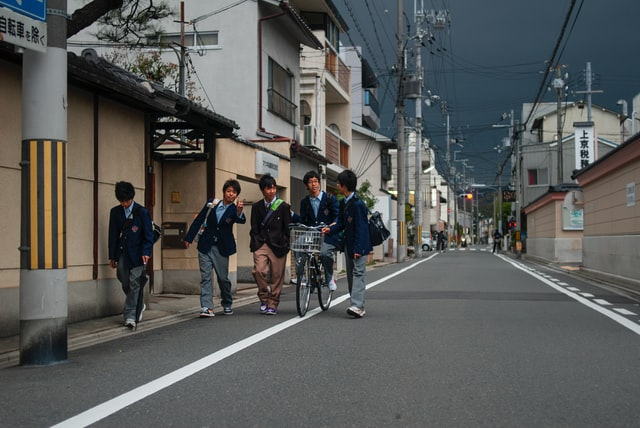

Photo by <a href="https://unsplash.com/@vonshnauzer?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Egor Myznik</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

あと、世界的に比べると日本のカグラーでは学生が少ないことが見つかりました。

Furthermore, we can see that there are fewer students among Japanese Kagglers.

In [ ]:
temp = responses.groupby('japan')['Q5'].value_counts().to_frame()

temp.columns = ['amount']
temp = temp.reset_index(drop=False)
temp = temp.pivot(index='japan', columns ='Q5')['amount']

temp['all'] = temp.sum(axis=1)

for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop(['all'], axis=1)
temp = temp[responses['Q5'].value_counts().index]

temp = temp.reset_index(drop=False)

g = sns.catplot(x='japan', y='Student',kind='bar',data=temp,
                height=6, aspect=1/1,
                palette = [other_color, japan_color])
g.ax.set_ylim(0,30)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + 0.3
    txt_y = p.get_height()+0.5
    g.ax.text(txt_x,txt_y,txt)

g.ax.set_xlabel('')
g.ax.set_xticklabels(['Rest of World', 'Japan'])
g.ax.set_ylabel('Percentage [%]')
g.ax.set_title('Percentage of Students among Kagglers')
plt.show()

確かに世界的に比べると日本では年上のカグラーが多くて、２５歳以下の方が少ないです。

This fact is also reflected in the age distribution which shows that the percentage of Kagglers below the age of 25 is lower in Japan than in the rest of the world.

その上、学生のカグラーを抜いても日本のカグラーの平均年齢が世界の家具ラーと比べると高いです。

Even if we remove the student Kagglers from the age distribution we can see that Japanese Kagglers are older on average than other Kagglers.

In [ ]:
temp = responses.groupby('japan').Q1.value_counts(normalize=True).to_frame()
temp = temp * 100
temp.columns = ['amount']

temp = temp.reset_index(drop=False)

temp = temp.pivot(index='japan', columns='Q1')['amount']
temp = temp.T
temp.columns = ['Row', 'Japan']
# create data
labels = temp.index.values
y1 = temp['Row'].values
y2 = temp['Japan'].values

width = 0.35  # the width of the bars

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))  # the label locations

rects1 = ax.bar(x -width/2, y1, width, label='Rest of World', color=other_color)
rects2 = ax.bar(x + width/2, y2, width, label='Japan', color=japan_color)

plt.xlabel("Age")
plt.ylabel("Percentage [%]")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
plt.legend()
plt.title('Age Distribution among Kagglers')
plt.show()


temp = responses[(responses.Q5 != 'Student')].groupby('japan').Q1.value_counts(normalize=True).to_frame()
temp = temp * 100
temp.columns = ['amount']

temp = temp.reset_index(drop=False)

temp = temp.pivot(index='japan', columns='Q1')['amount']
temp = temp.T
temp.columns = ['Row', 'Japan']
# create data
labels = temp.index.values
y1 = temp['Row'].values
y2 = temp['Japan'].values

width = 0.35  # the width of the bars

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))  # the label locations

rects1 = ax.bar(x -width/2, y1, width, label='Rest of World', color=other_color)
rects2 = ax.bar(x + width/2, y2, width, label='Japan', color=japan_color)
ax.add_patch(Ellipse((7, 8), width=12, height=3, angle=115, fill=False, alpha=1, color='k', lw=1))

plt.xlabel("Age")
plt.ylabel("Percentage [%]")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
plt.legend()
plt.title('Age Distribution among Kagglers without Students')
plt.show()

# データーサイエンスとの関係　Japanese Kagglers and Data Science

その上、データーサイエンスのテクニックを使用しているカグラーを比べて見ると日本の方の方が平均の社会人カグラーよりもMLとCVテクニックでは詳しいみたいです。

Furthermore, it looks like Japanese Kagglers are more familiar with ML and CV methods than the average working Kaggler.

もしかしたら、これは日本のカグラーの平均年齢と関係しているかもしれません。確認してみましょう。

Might this be related to the higher average age of Japanese Kagglers? Let's check this theory.

In [ ]:
ml_cols = ['Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10', 'Q17_OTHER']

cv_cols = ['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_OTHER']

nlp_cols = ['Q19_Part_1', 'Q19_Part_2', 'Q19_Part_3', 'Q19_Part_4', 'Q19_OTHER']

responses['ml_usage'] = responses[ml_cols].any(axis=1)
responses['cv_usage'] = responses[cv_cols].any(axis=1)
responses['nlp_usage'] = responses[nlp_cols].any(axis=1)


temp = responses[(responses.Q5 != 'Student')].groupby('japan')['ml_usage'].value_counts(normalize=True).to_frame()
temp.columns = ['percentage']
temp['percentage'] = temp['percentage'] * 100

temp = temp.reset_index()
temp = temp.pivot(index='japan', columns='ml_usage')['percentage']
temp = temp.reset_index()
temp['tech'] = 'ml'

temp2 = responses[(responses.Q5 != 'Student')].groupby('japan')['cv_usage'].value_counts(normalize=True).to_frame()
temp2.columns = ['percentage']
temp2['percentage'] = temp2['percentage'] * 100
temp2 = temp2.reset_index()
temp2 = temp2.pivot(index='japan', columns='cv_usage')['percentage']
temp2 = temp2.reset_index()
temp2['tech'] = 'cv'

temp = pd.concat([temp, temp2])

temp2 = responses[(responses.Q5 != 'Student')].groupby('japan')['nlp_usage'].value_counts(normalize=True).to_frame()
temp2.columns = ['percentage']
temp2['percentage'] = temp2['percentage'] * 100
temp2 = temp2.reset_index()
temp2 = temp2.pivot(index='japan', columns='nlp_usage')['percentage']
temp2 = temp2.reset_index()
temp2['tech'] = 'nlp'

temp = pd.concat([temp, temp2])

temp = temp.pivot(index='tech', columns='japan')[True]
temp.columns = ['Rest of world', 'Japan']

# create data
labels = ['CV', 'ML', 'NLP']
y1 = temp['Rest of world'].values
y2 = temp['Japan'].values

width = 0.2  # the width of the bars

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))  # the label locations

rects1 = ax.bar(x -width, y1, width, label='Rest of World', color=other_color)
rects2 = ax.bar(x, y2, width, label='Japan', color=japan_color)

plt.xlabel("Method")
plt.ylabel("Percentage [%]")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 100])
plt.title('Comparison of Familiarity with Data Science Methods')
plt.legend()
plt.show()

詳しくみてみると、特にMLテクニックとCVテクニックでは４５歳を超えているカグラーでは日本の方の方が詳しいみたいです。

On a closer look, we can see that especially for ML methods and CV methods Japanese Kagglers above the age of 45 seem to be more familiar.

NLPテクニックでは世界的に比べるとレベルが似たようです。

Regarding NLP methods the familiarity is similar to the rest of the world.

In [ ]:
#temp = responses[(responses.Q5 != 'Student')].groupby(['japan', 'Q1'])['ml_usage', 'cv_usage', 'nlp_usage'].sum().reset_index(drop=False)
temp = responses[(responses.Q5 != 'Student')].groupby(['japan', 'Q1'])['ml_usage', 'cv_usage'].sum().reset_index(drop=False)
temp['all'] = responses[(responses.Q5 != 'Student')].groupby(['japan', 'Q1'])['Q1'].count().values
for c in ['ml_usage', 'cv_usage']:#, 'nlp_usage']:
    temp[c] = temp[c]/temp['all']*100

    
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for i, j in enumerate(['ml_usage', 'cv_usage']):#, 'nlp_usage']):
    df = temp.pivot(index='Q1', columns='japan')[j].reset_index(drop=False)
    df.columns = ['Age', 'Rest of World', 'Japan']
    sns.lineplot(data=df, x='Age', y='Japan', color=japan_color, ax=ax[i])
    sns.lineplot(data=df, x='Age', y='Rest of World', color=other_color, ax=ax[i])
    ax[i].set_title(j)
    ax[i].set_ylabel('Percentage [%]')
    ax[i].set_ylim([0,100])
    
ax[0].set_title('ML Methods')
ax[0].add_patch(Ellipse((8, 75), width=5, height=25, angle=0, fill=False, alpha=1, color='k', lw=1))

ax[1].set_title('CV Methods')
ax[1].add_patch(Ellipse((8, 30), width=5, height=25, angle=0, fill=False, alpha=1, color='k', lw=1))

plt.suptitle('Familiarity with Selected Data Science Methods')
plt.tight_layout()
plt.show()

# 英語 English
日本ではメディアンのサーベイを答える時間は役１３分３０秒でした。

Japanese Kagglers took around 13 minutes 30 seconds to finish the survey.

ネイティブで英語を喋る国では役１０分５秒、ネイティブで英語を喋らない国では役１１分でした。

In contrast, countries where the majority of the population speak natively English only took 10 minutes and 5 seconds. Other non native English speaking countries took around 11 minutes.

この理由はもしかしたら、日本のカグラーの英語力が世界的に比べると弱いかもしれないからだと思います。

The reason for this could be that Japanese Kagglers' English mimght not be as strong as in other countries.

確かに、日本語と英語は全く似てないため、日本人には英語を習うことが難しいとおもいます。

In fact, due to the very different structure of the two languages, it is difficult for Japanese to learn English.

もしこのテーマに興味があればこのメディアムの記事が面白いとおもいます。[Why Japanese People Find English So Difficult](https://medium.com/@zx548/why-japanese-people-find-english-so-difficult-ea0a6cbd3bda)

If you are further interested in this topic, I recommend this medium article: [Why Japanese People Find English So Difficult](https://medium.com/@zx548/why-japanese-people-find-english-so-difficult-ea0a6cbd3bda)

In [ ]:
native_speaker = ['Australia', 'Canada', 'Ireland', 'United Kingdom of Great Britain and Northern Ireland',
       'United States of America']

responses['non_native_english'] = responses.Q3.apply(lambda x: 0 if x in native_speaker else (2 if x == 'Japan' else 1))

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
responses['Time from Start to Finish (minutes)'] = responses['Time from Start to Finish (seconds)'].astype(int)/60
ax = sns.boxplot(y='Time from Start to Finish (minutes)', x='non_native_english', data=responses, fliersize=0, palette=[other_color,other_color, japan_color])

ax.set_ylim([0,40])
ax.set_xticklabels(['Native English RoW', 'Non Native English RoW', 'Japan'])
ax.set_xlabel('')
plt.show()

# メディア Media

In [ ]:
media_sources = ['Twitter', 'Newsletters', 'Reddit', 'Kaggle', 'Course Forums', 'YouTube', 'Podcasts', 'Blogs', 'Journal Publications', 'Slack Communities']
i=1
temp = responses[['japan', f'Q42_Part_{i}']]
temp[f'Q42_Part_{i}'] = temp[f'Q42_Part_{i}'].notna()

temp = temp.groupby('japan')[f'Q42_Part_{i}'].value_counts(normalize=True).to_frame()
temp.columns = [media_sources[i-1]]
temp = temp.reset_index(drop=False)
temp  = temp[temp[f'Q42_Part_{i}'] == True]
df = temp[[media_sources[i-1]]].copy()

for i in range(2,11):
    temp = responses[['japan', f'Q42_Part_{i}']]
    temp[f'Q42_Part_{i}'] = temp[f'Q42_Part_{i}'].notna()

    temp = temp.groupby('japan')[f'Q42_Part_{i}'].value_counts(normalize=True).to_frame()
    temp.columns = [media_sources[i-1]]
    temp = temp.reset_index(drop=False)
    temp  = temp[temp[f'Q42_Part_{i}'] == True]
    
    df = pd.concat([df, temp[media_sources[i-1]]], axis=1)

df = df*100

labels = df.columns.values
y1 = df.loc[1].values
y2 = df.loc[3].values

width = 0.4  

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))

rects1 = ax.bar(x -width, y1, width, label='Rest of world', color=other_color)
rects2 = ax.bar(x, y2, width, label='Japan', color=japan_color)

plt.xlabel("Media Source")
plt.ylabel("Percentage [%]")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
plt.legend()
plt.show()

# 結語 Conclusion

* 日本のカグラーの女性の割が低い。
* In Japan, the percentage of female Kagglers is still lower than in the rest of the world.
* 日本ではデーターサイエンティストよりもソフト開発者の方が多いのに、日本のカグラーは世界的に比べるとMLとCVのメソッドに詳しい。
* Although, there are fewer Kagglers with the role "Data Scientist" and more software engineers in Japan, Japanese Kagglers seem to be more familiar with ML and CV methods.
* 世界的に比べると、日本のカグラーでは学生が少ない上、年上のデーターサイエンスの先輩が多い。
* In comparison to the rest of the world, there are fewer students among Japanese Kagglers. Instead there are more experienced older Kagglers.